Importing libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

Loading and preprocessing the data.

Loading the MNIST dataset returns two tuples: one for the training data and one for the test data.

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Normalising the data. Dividing by 255.0 scales the pixel values from the range [0, 255] to the range [0, 1]. This is important for neural networks as it helps in faster convergence during training.

In [5]:
X_train, X_test = X_train / 255.0, X_test / 255.0

Reshaping the data to fit the model. We have to reshape because the original shape of each image is (28, 28), but the CNN expects input data to have an additional dimension for the color channel. Since the images are grayscale we have to add a single channel (1) resulting in the shape (28, 28, 1).

In [6]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

One-hot encoding the labels. This means that we convert the labels from integers (0-9) to one-hot encoded vectors. For example the label '3' is converted to [0, 0, 0, 1, 0, 0, 0, 0, 0, 0].

In [7]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

Building the model.


**Sequential** is a linear stack of layers.

**Conv2D** applies a convolution operation to the input image which helps in extracting features such as edges, textures and such. It is a layer with 32 filters, each of size 3x3. The ReLU activation function introduces non-linearity.

**MaxPooling2D** is a pooling layer that reduces the dimensionality (height and width) by taking the maximum value in each 2x2 block of the feature maps while still retaining the most important information.

**Flatten** flattens (duh!) the 3D output of the convolutional layers into a 1D vector.

Thanks to **Dense** we get fully connected layers where each neuron is connected to every neuron in the previous layer. The last Dense layer with softmax activation outputs the probabilities for each class (digits 0-9).

In [8]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compiling the model.

**optimizer='adam'**: Adam is an optimisation algorithm that adjusts the learning rate during training.

**loss='categorical_crossentropy'** -this is the loss function used for multi-class classification problems.

**metrics=['accuracy']** -this tells Keras to calculate accuracy during training and evaluation.

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

Training the model.

**.fit()** trains the model.


**X_train, y_train** are the training data and labels.


**validation_split=0.2** means that 20% of the training data is used for validation.


**epochs=10** is the number of times the entire training dataset is passed through the network.


**batch_size=200** is the number of samples per gradient update.


**verbose=2** - displays the training progress.

In [11]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=200, verbose=2)

Epoch 1/10
240/240 - 23s - 95ms/step - accuracy: 0.9212 - loss: 0.2916 - val_accuracy: 0.9726 - val_loss: 0.1022
Epoch 2/10
240/240 - 42s - 175ms/step - accuracy: 0.9753 - loss: 0.0860 - val_accuracy: 0.9784 - val_loss: 0.0741
Epoch 3/10
240/240 - 41s - 173ms/step - accuracy: 0.9826 - loss: 0.0587 - val_accuracy: 0.9816 - val_loss: 0.0611
Epoch 4/10
240/240 - 22s - 92ms/step - accuracy: 0.9866 - loss: 0.0451 - val_accuracy: 0.9830 - val_loss: 0.0564
Epoch 5/10
240/240 - 41s - 173ms/step - accuracy: 0.9894 - loss: 0.0353 - val_accuracy: 0.9809 - val_loss: 0.0626
Epoch 6/10
240/240 - 41s - 171ms/step - accuracy: 0.9920 - loss: 0.0273 - val_accuracy: 0.9832 - val_loss: 0.0548
Epoch 7/10
240/240 - 41s - 172ms/step - accuracy: 0.9941 - loss: 0.0207 - val_accuracy: 0.9852 - val_loss: 0.0527
Epoch 8/10
240/240 - 21s - 88ms/step - accuracy: 0.9952 - loss: 0.0164 - val_accuracy: 0.9853 - val_loss: 0.0546
Epoch 9/10
240/240 - 43s - 178ms/step - accuracy: 0.9961 - loss: 0.0137 - val_accuracy: 0.9

Evaluating the model by computing the loss and accuracy on the test data.

**verbose=0** suppresses the output.

**score[0]** represents test loss and **score[1]** represents test accuracy.

In [12]:
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.050775282084941864 / Test accuracy: 0.9854000210762024


Making predictions for the test data.

**np.argmax(y_pred, axis=1)** converts the predicted probabilities to class labels.

**np.argmax(y_test, axis=1)** converts the one-hot encoded test labels back to class labels.

In [13]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


Creating the confusion matrix.

**sns.heatmap** plots the confusion matrix using a heatmap with some pretty blue colours. :)

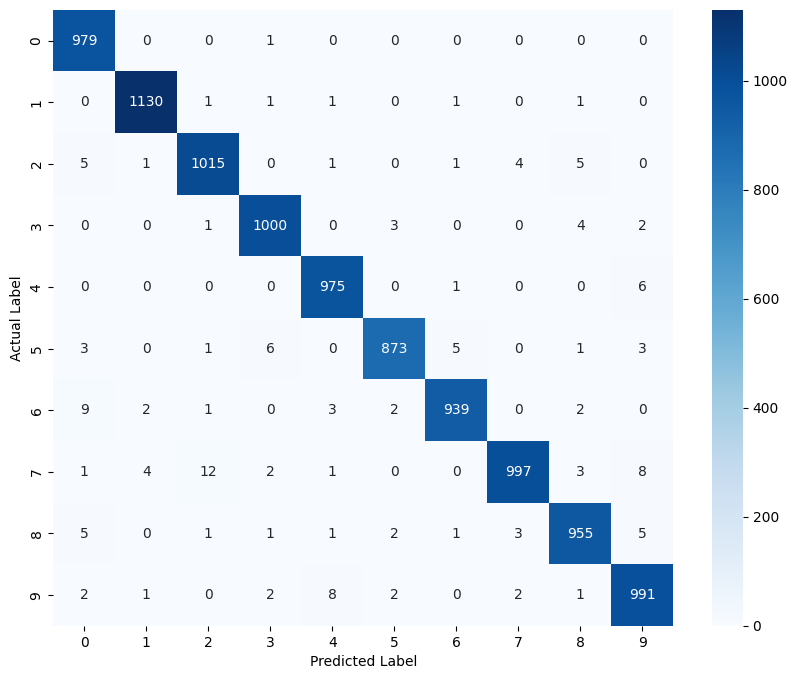

In [14]:
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

Visualising some of the test results.

**plt.subplots(3, 3, figsize=(8, 8))** creates a 3x3 grid of subplots.

**axes = axes.ravel()** flattens the 2D array of axes to a 1D array for easy iteration.

**axes[i].imshow(X_test[i].reshape(28, 28), cmap='gray')** displays the test image.

**axes[i].axis('off')** hides the axis.

**plt.subplots_adjust(wspace=0.5)** adjusts the spacing between subplots.

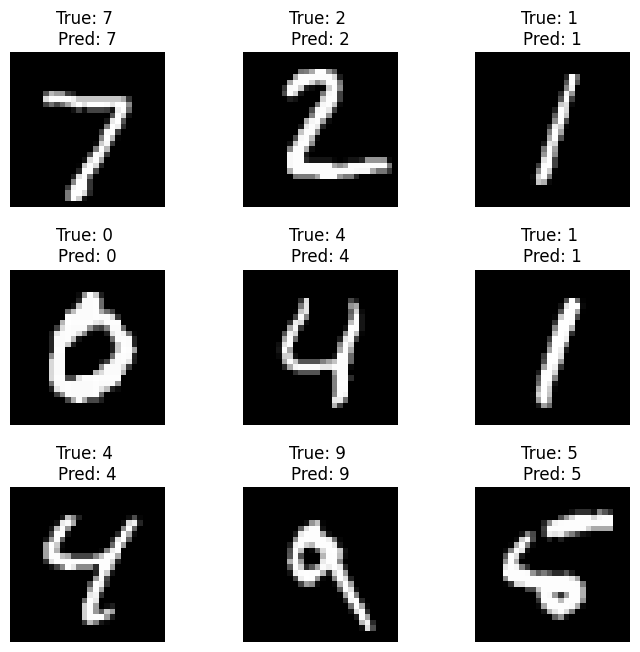

In [15]:
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
axes = axes.ravel()

for i in np.arange(0, 9):
    axes[i].imshow(X_test[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f"True: {y_true[i]} \nPred: {y_pred_classes[i]}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)
plt.show()

In [25]:
model.save('my_model.keras')  # we'll need this in a little bit (: